## This code begins with the importation of all necessary libraries to run it.

In [1]:
import numpy as np
import pandas as pd
import threading
import time
import pickle
import math
from psutil import cpu_percent, swap_memory
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist, cdist, squareform
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import os
import Functions as fu
import seaborn as sn
from scipy.stats import moment
from datetime import datetime

### The cell below declares and exhibits the directories structure of the model:

In [2]:
# Adding paths for the code to the model's folders
        
add_path1 = "/PCA_Analyses/"
add_path2 = "/Input/"
add_path3 = "/.Kernel/"
add_path4 = "/PCA_Analyses/Figures/"
add_path5 = "/Recovery/"
add_path6 = "/SODA/"
base_path = os.getcwd()
PCA_Analyses_path = base_path + add_path1
Input_path = base_path + add_path2
Kernel_path = base_path + add_path3
PCA_Figures_path = base_path + add_path4
Recovery_path = base_path + add_path5
SODA_path = base_path + add_path6

### The cell below declares variables for perfomance analysis:

In [3]:
class performance(threading.Thread):
    def __init__(self):
        threading.Thread.__init__(self)
        self.control = True
    
    def run(self):
        cpu_p = []
        ram_p = []
        ram_u = []
        while self.control:
            cpu_p.append(cpu_percent(interval=1, percpu=True))
            ram_p.append(swap_memory().percent)
            ram_u.append(swap_memory().used/(1024**3))
        self.mean_cpu_p = np.mean(cpu_p)
        self.mean_ram_p = np.mean(ram_p)
        self.mean_ram_u = np.mean(ram_u)
        self.max_cpu_p = np.max(np.mean(cpu_p, axis=1))
        self.max_ram_p = np.max(ram_p)
        self.max_ram_u = np.max(ram_u)
    
    def stop(self):
        self.control = False
    
    def join(self):
        threading.Thread.join(self)
        out = {'mean_cpu_p': self.mean_cpu_p,
               'mean_ram_p': self.mean_ram_p,
               'mean_ram_u': self.mean_ram_u,
               'max_cpu_p': self.max_cpu_p,
               'max_ram_p': self.max_ram_p,
               'max_ram_u': self.max_ram_u}
        return out

## The following cells present the model methods and outputs

- Firstly the model loads the background and signal data, then it removes the attributes first string line, in order to avoid NaN values in the array.

In [4]:
# Changing to the Input folder

os.chdir( Input_path )

# Loading data into the code
  
### Background    

b_name='Input_Background_1.csv'

background = np.genfromtxt(b_name, delimiter=',')
background = background[1:,:]

### Signal

s_name='Input_Signal_1.csv'

signal = np.genfromtxt(s_name, delimiter=',')
signal = signal[1:,:]

# Changing to base folder:

os.chdir( base_path )

- Here we present the shapes of background and signal data.

In [5]:
print('Background data shape:')
print(background.shape)

print('Signal data shape:')
print(signal.shape)

Background data shape:
(543500, 21)
Signal data shape:
(522467, 21)


#### If you want to continue the previous analysis, the following cell loads the necessary data for you.

Ps.: In this case do not run the reduction script which is the next process.

In [9]:
# Changing to Recovery folder

os.chdir( Recovery_path )

reduced_background = np.savetxt('Reduced_' + b_name,reduced_background,delimiter=',')
background_sample_id = np.savetxt('Reduced_ID_' + b_name,background_sample_id,delimiter=',')

print('Reduced Background data shape:')
print(reduced_background.shape)

reduced_background_on = np.savetxt('Reduced_online_' + b_name,reduced_background_on,delimiter=',')
background_on_sample_id = np.savetxt('Reduced_ID_online' + b_name,background_on_sample_id,delimiter=',')

print('Reduced Online Background data shape:')
print(reduced_background_on.shape)

reduced_signal = np.savetxt('Reduced_' + s_name,reduced_signal,delimiter=',')
signal_sample_id = np.savetxt('Reduced_ID_' + s_name,signal_sample_id,delimiter=',')

print('Reduced Online Signal data shape:')
print(reduced_signal.shape)

# Changing to base folder

os.chdir( base_path )

Background data shape:
(543500, 21)
Signal data shape:
(522467, 21)
Reduced Background data shape:
(500, 21)
Reduced signal data shape:
(5225, 21)
Reduced background labels shape:
(5435,)
Reduced signal labes data shape:
(5225,)


- In order to grant impartial results, we randomly split the Background data into test and training sub-sets.

In [6]:
# Devide data-set into training and testing sub-sets

background_train, background_test = train_test_split(background, test_size=0.80, random_state=42)

- Due to the data dimensionality, only a percentage of the events can be processed at a time. By the means of reducing the number of events, the data was divided into consecutive windows of events. From each window, a number of events were randomly maintained in the reduced data. This function is set by default to use 1% of the data and each window has 100 events. However, in this example, we have used 5K events of the Background on the offline phase. In the online phase, 990 events of the Background and 10 events of the Signal were processed.

In [7]:
# Number of Data-set divisions
windows = 100

# Number of events in offline and online phase
offline_samples = 5000
online_samples = 1000

# Defining number of events from Backgorund and Singal into the online sub-set
background_samples = int(online_samples * 0.99)
signal_samples = int(online_samples - background_samples)

# DIVIDE BACKGROUND
reduced_background, background_sample_id = fu.divide(background, windows,offline_samples)

# Devide online Backgound 
reduced_background_on, background_on_sample_id = fu.divide (background_test, windows, background_samples)

# Devide online signal
reduced_signal, signal_sample_id = fu.divide(signal, windows, signal_samples)

# Concatanating IDs and creating labels
sample_id = np.concatenate((background_on_sample_id, signal_sample_id), axis=0)


- Nextly, the reduced data is saved in the Recovery directory.

In [8]:
# Changing to Recovery folder

os.chdir( Recovery_path )

np.savetxt('Reduced_' + b_name,reduced_background,delimiter=',')
np.savetxt('Reduced_ID_' + b_name,background_sample_id,delimiter=',')

print('Reduced Background data shape:')
print(reduced_background.shape)

np.savetxt('Reduced_online_' + b_name,reduced_background_on,delimiter=',')
np.savetxt('Reduced_ID_online' + b_name,background_on_sample_id,delimiter=',')

print('Reduced Online Background data shape:')
print(reduced_background_on.shape)

np.savetxt('Reduced_' + s_name,reduced_signal,delimiter=',')
np.savetxt('Reduced_ID_' + s_name,signal_sample_id,delimiter=',')

print('Reduced Online Signal data shape:')
print(reduced_signal.shape)

# Changing to base folder

os.chdir( base_path )

Reduced Background data shape:
(5000, 21)
Reduced Online Background data shape:
(990, 21)
Reduced Online Signal data shape:
(10, 21)


- Aiming to improve data patterns differentiation, in the following cell, we calculate the [moments](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.moment.html) of each event regarding its 21 attributes. The moments used were of 2nd ([variance](https://en.wikipedia.org/wiki/Variance)), 3rd ([skewness](https://en.wikipedia.org/wiki/Skewness)) and 4th ([kurtosis](https://en.wikipedia.org/wiki/Kurtosis)) order. Check the links for further information.

In [9]:
moment2 = moment(reduced_background.transpose(), moment=2).reshape(-1,1)
moment3 = moment(reduced_background.transpose(), moment=3).reshape(-1,1)
moment4 = moment(reduced_background.transpose(), moment=4).reshape(-1,1)

reduced_background = np.concatenate((reduced_background,moment2,moment3,moment4), axis=1)
       
moment2 = moment(reduced_background_on.transpose(), moment=2).reshape(-1,1)
moment3 = moment(reduced_background_on.transpose(), moment=3).reshape(-1,1)
moment4 = moment(reduced_background_on.transpose(), moment=4).reshape(-1,1)

reduced_background_on = np.concatenate((reduced_background_on,moment2,moment3,moment4), axis=1)

moment2 = moment(reduced_signal.transpose(), moment=2).reshape(-1,1)
moment3 = moment(reduced_signal.transpose(), moment=3).reshape(-1,1)
moment4 = moment(reduced_signal.transpose(), moment=4).reshape(-1,1)

reduced_signal = np.concatenate((reduced_signal,moment2,moment3,moment4), axis=1)

### PCA:

- The principal component analysis method is calculated only with the background data, aiming to maximize anomalies differentiation.

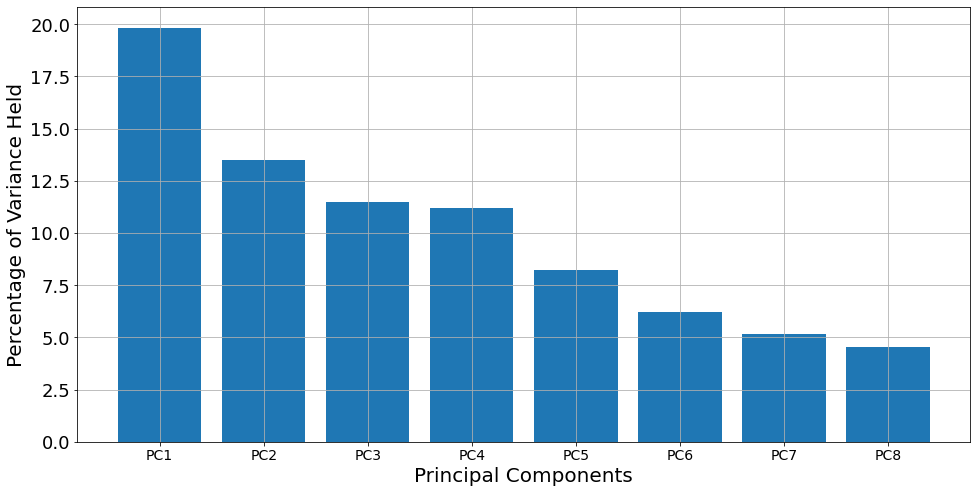

Variation maintained: 80.18


In [10]:
# Changing to Kernel folder

os.chdir( PCA_Analyses_path )

N_PCs = 8

background_scaler = StandardScaler().fit(reduced_background)
standard_data = background_scaler.transform(reduced_background)

pca= PCA(n_components = N_PCs)
pca.fit(standard_data)
        
# save the model to disk

pickle.dump(pca, open('pca.sav', 'wb'))
        
variacao_percentual_pca = np.round(pca.explained_variance_ratio_ * 100, decimals = 2)
        
# Now change to PCA Figures directory

os.chdir( PCA_Figures_path )
        
fig = plt.figure(figsize=[16,8])
ax = fig.subplots(1,1)
ax.bar(x=['PC' + str(x) for x in range(1,(N_PCs+1))],height=variacao_percentual_pca[0:N_PCs])

ax.set_ylabel('Percentage of Variance Held',fontsize=20)
ax.set_xlabel('Principal Components',fontsize=20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=18)
ax.grid()
plt.show()
fig.savefig('Percentage_of_Variance_Held_1.png', bbox_inches='tight')

print('Variation maintained: %.2f' % variacao_percentual_pca.sum())

# Now change to base directory

os.chdir( base_path )

- Then a PCA variation and relevance of attributes analysis is performed.

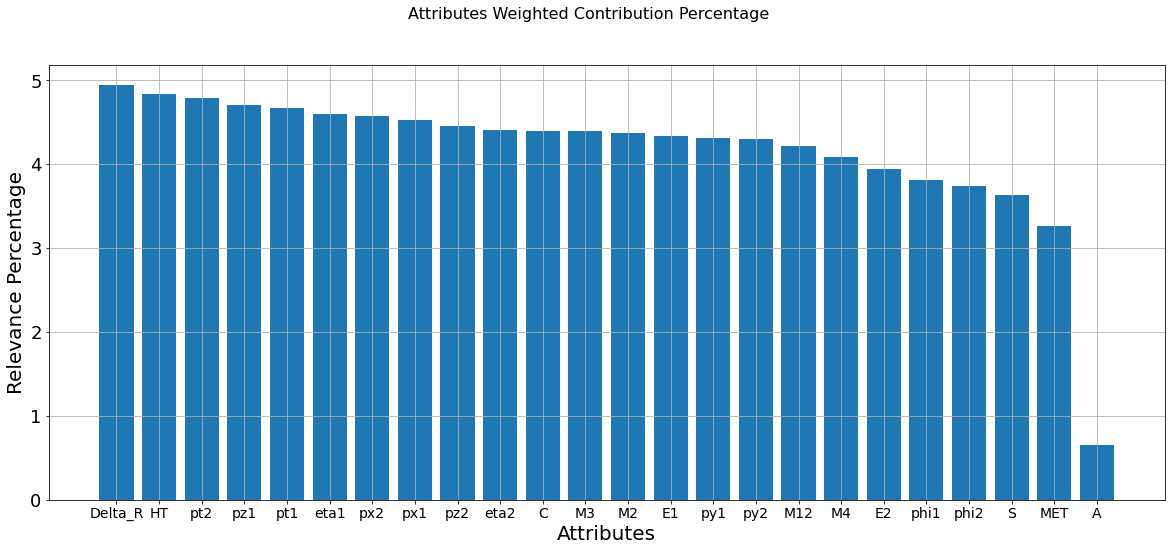

In [11]:
# Now change to PCA Figures directory

os.chdir( PCA_Figures_path )

### Attributes analyses ###

background_df = pd.DataFrame(reduced_background, columns=["px1","py1","pz1","E1","eta1","phi1","pt1","px2","py2",\
                                                  "pz2","E2","eta2","phi2","pt2","Delta_R","M12","MET","S",\
                                                  "C","HT","A","M2","M3","M4"])

eigen_matrix = np.array(pca.components_)
eigen_matrix = pow((pow(eigen_matrix,2)),0.5) #invertendo valores negativos

for i in range (eigen_matrix.shape[0]):

    LineSum = sum(eigen_matrix[i,:])
    for j in range (eigen_matrix.shape[1]):
        eigen_matrix[i,j] = ((eigen_matrix[i,j]*100)/LineSum)

weighted_contribution = np.zeros((2,eigen_matrix.shape[1]))

for i in range (eigen_matrix.shape[1]):
    NumeratorSum = 0
    for j in range (N_PCs):
        NumeratorSum += eigen_matrix[j,i] * variacao_percentual_pca[j]

    weighted_contribution[0,i] = NumeratorSum / sum(variacao_percentual_pca)

                    
sensors_contribution = pd.DataFrame (weighted_contribution, columns = background_df.columns)
                    
sensors_contribution = sensors_contribution.sort_values(by=0, axis=1,ascending=False)
                    
sorted_sensors_contribution = sensors_contribution.values[0,:] 
                    
background_df = background_df [sensors_contribution.columns]
                    
                    
#Ploting Cntribution Sensors Results
                    
fig = plt.figure(figsize=[20,8])

fig.suptitle('Attributes Weighted Contribution Percentage', fontsize=16)

ax = fig.subplots(1,1)

s = sorted_sensors_contribution[:]

ax.bar(x=sensors_contribution.columns,height=s)
plt.ylabel('Relevance Percentage',fontsize = 20)
plt.xlabel('Attributes',fontsize = 20)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=18)
ax.grid()

plt.show()
fig.savefig('Attributes_Weighted_Contribution_Percentage_1.png', bbox_inches='tight')



# Now change to base directory

os.chdir( base_path )

- It is important to observe that the moments (M2, M3 and M4) influence on the model is greater than some original attributes.

- Finaly, the online and offiline data are normalized and projected in the calculated PCs.

In [12]:
# Projecting Background
projected_background = pca.transform(standard_data)

# Normalizing online Background
scaler = StandardScaler().fit(reduced_background_on)
standard_background_on= scaler.transform(reduced_background_on)

# Projecting online Background
projected_background_on = pca.transform(standard_background_on)

# Normalizing online Signal
scaler = StandardScaler().fit(reduced_signal)
standard_signal = scaler.transform(reduced_signal)

# Projecting online Signal
projected_signal = pca.transform(standard_signal)


### SODA:

#### .Available distances: 
 ##### Offline Mode:
 - euclidean - linha reta entre os pontos
 - mahalanobis - correlação entre as variaveis (determina similaridade)
 - cityblock - distancia das projeções dos pontos (taxicab/manhattan)
 - chebyshev - maior distancia entre as coordenadas (rei)
 - minkowski - generalização de outras distâncias:
  - p = 1 $\rightarrow$ cityblock,
  - p = 2 $\rightarrow$ euclidean,
  - p = $\infty$ $\rightarrow$ chebyshev.
 - canberra - versão com pesos da cityblock, sensivel para pontos proximos à origem
 
 ##### Evolving Mode:
 - euclidean - linha reta entre os pontos

#### The following cell formats the offline and online data to begin SODA analyse

In [13]:
###### Formmating Original Data

# Formatting Background
Data1 = projected_background
Data1 = np.matrix(Data1)
L1, W = Data1.shape
        
# Formatting Online Background
Data2= projected_background_on
Data2 = np.matrix(Data2)
L2, W2 = Data2.shape

# Formatting Online Signal
Data3= projected_signal
Data3 = np.matrix(Data3)
L3, _ = Data3.shape

# Concatenating Online Background and Signal
streaming_data = np.concatenate((Data2,Data3), axis=0)
data = np.concatenate((Data1, streaming_data), axis=0)

- Aiming to compare the model performance for different granularities between `min_granularity` and `max_granularity` , we loop the SODA process in the next cell.



- The granularity in SODA algorithm stands for a sensibility parameter used in the data partitioning task. Therefore the use of greater granularities results in a greater number of data-clouds. Consequently, the following analyses aim to compare, for different granularities, our model performance when using the original attributes and when using the original attributes along with Moments of $2^{nd},3^{rd}~and~4^{th}$ order.



- Due to the time required to run this cell for big granularities, we presented here just an example. The complete process will be executed on the script form of our code. We encourage you to see and study it by clicking [here](https://github.com/Esterci/SODA_Anomaly_Detection/tree/master/Script_Version).

In [14]:
# Number of iterations
min_granularity = 1
max_granularity = 2

delta = max_granularity - min_granularity + 1


- In the next cell we create data frames to save each iteration result.

In [15]:
detection_info = pd.DataFrame(np.zeros((delta, 6)), columns=['Granularity','True_Positive', 'True_Negative','False_Positive','False_Negative', 'N_Groups'])

performance_info = pd.DataFrame(np.zeros((delta, 8)), columns=['Granularity', 'Time_Elapsed',
                                                            'Mean CPU_Percentage', 'Max CPU_Percentage',
                                                            'Mean RAM_Percentage', 'Max RAM_Percentage',
                                                            'Mean RAM_Usage_GB', 'Max RAM_Usage_GB'])

#### Method explanation:

- The SODA is a self-organized algorithm which, partitions a data-set into non-parametric data-clouds. In the offline mode, we deliver to SODA a data-set compound only by normal events (background). Afterward, in its online mode, SODA re-organizes those data-clouds to follow the streaming data patterns. Thus, by analyzing the difference between data clouds before and after a streaming data arrival, one can identify anomaly data patterns (from the signal). This analysis calculates how much of the offline data is inside each data-cloud after the streaming data arrival. Consequently, data-cloud with more offline data is more similar to normal events (background). Those with no offline data are regarded as anomaly data-clouds since they don't follow the offline data patterns.



- Furthermore, considering that our testing data-set should respect the proportion of 99% background and 1% signal, we label these events to ensure that they were correctly classified. However, these labels do not take part in the model's decision.


#### Applying SODA to the original Data

In [16]:
os.chdir( SODA_path )

for gra in range (min_granularity, max_granularity+1):
    begin = datetime.now()

    i = gra - min_granularity

    performance_thread = performance()
    performance_thread.start()
    
    detection_info.loc[i,'Granularity'] = gra
    performance_info.loc[i,'Granularity'] = gra
    
    print('### Granularity ' + str(gra) + ' ###')

    Input = {'GridSize':gra, 'StaticData':Data1, 'DistanceType': 'euclidean'}

    out = fu.SelfOrganisedDirectionAwareDataPartitioning(Input,'Offline')

    # Concatanating IDs and creating labels
        
    new_label = np.zeros((int(online_samples)))
    new_label[background_samples:] = 1
    
    new_decision = np.zeros((int(online_samples)))
    
    Input['StreamingData'] = streaming_data
    Input['SystemParams'] = out['SystemParams']
    Input['AllData'] = data
    
    online_out = fu.SelfOrganisedDirectionAwareDataPartitioning(Input,'Evolving')

    
    signal_centers = online_out['C']
    soda_labels = online_out['IDX']
    online_soda_labels = soda_labels[(L1):]
    
    cloud_info = pd.DataFrame(np.zeros((len(signal_centers),4)),columns=['Total_Samples','Old_Samples','Percentage_Old_Samples', 'Percentage_of_Samples'])
    
    for j in range (len(soda_labels)):
        if j < L1:
            cloud_info.loc[int(soda_labels[j]),'Old_Samples'] += 1

        cloud_info.loc[int(soda_labels[j]),'Total_Samples'] += 1

    cloud_info.loc[:,'Percentage_Old_Samples'] = cloud_info.loc[:,'Old_Samples'] * 100 / cloud_info.loc[:,'Total_Samples']
    cloud_info.loc[:,'Percentage_of_Samples'] = cloud_info.loc[:,'Total_Samples'] * 100/ cloud_info.loc[:,'Total_Samples'].sum()

    
    anomaly_clouds=[]
    n_anomalies = 0

    for j in range(len(signal_centers)):
        if cloud_info.loc[j,'Percentage_Old_Samples'] == 0 :
            n_anomalies += cloud_info.loc[j,'Total_Samples']
            anomaly_clouds.append(j)
    
    if n_anomalies != 0:
        
        anomalies_df = pd.DataFrame(np.zeros((int(n_anomalies),2)), columns=['Sample_Id','Cloud_ID'])
        
        k = 0
        
        for j in range(len(online_soda_labels)): 
            if online_soda_labels[j] in anomaly_clouds:
                anomalies_df.loc[k,'Sample_Id'] = sample_id [j]
                anomalies_df.loc[k,'Cloud_ID'] = soda_labels[j]
                new_decision[j] = 1
                k +=1

        # Save Results 
        anomalies_df.to_csv('anomalies_Iterantion_' + str(gra) + '.csv')
        
    for j in range(len(new_label)):
        if new_label[j] == 1:
            if new_decision[j] == new_label[j]:
                detection_info.loc[i,'True_Positive'] += 1
            
            else:
                detection_info.loc[i,'False_Negative'] += 1
                
        else:
            if new_decision[j] == new_label[j]:
                detection_info.loc[i,'True_Negative'] += 1
            
            else:
                detection_info.loc[i,'False_Positive'] += 1


    
    detection_info.loc[i, 'N_Groups'] = max(soda_labels)+1

    performance_thread.stop()
    performance_out = performance_thread.join()
    final = datetime.now()
    performance_info.loc[i,'Time_Elapsed'] = (final - begin)
    performance_info.loc[i,'Mean CPU_Percentage'] = performance_out['mean_cpu_p']
    performance_info.loc[i,'Max CPU_Percentage'] = performance_out['max_cpu_p']
    performance_info.loc[i,'Mean RAM_Percentage'] = performance_out['mean_ram_p']
    performance_info.loc[i,'Max RAM_Percentage'] = performance_out['max_ram_p']
    performance_info.loc[i,'Mean RAM_Usage_GB'] = performance_out['mean_ram_u']
    performance_info.loc[i,'Max RAM_Usage_GB'] = performance_out['max_ram_u']

    display1 = pd.DataFrame(detection_info.loc[i,:])
    display(HTML(display1.to_html()))
    
    display2 = pd.DataFrame(performance_info.loc[i])
    display(HTML(display2.to_html()))

    detection_info.to_csv('detection_info.csv', index=False)
    performance_info.to_csv('performance_info.csv', index=False)

os.chdir( base_path )

### Granularity 1 ###


,0
Granularity,1.0
True_Positive,0.0
True_Negative,990.0
False_Positive,0.0
False_Negative,10.0
N_Groups,4.0


,0
Granularity,1
Time_Elapsed,0:00:08.583966
Mean CPU_Percentage,30.4875
Max CPU_Percentage,33.8
Mean RAM_Percentage,0.1
Max RAM_Percentage,0.1
Mean RAM_Usage_GB,0.057373
Max RAM_Usage_GB,0.057373


### Granularity 2 ###


,1
Granularity,2.0
True_Positive,0.0
True_Negative,988.0
False_Positive,2.0
False_Negative,10.0
N_Groups,20.0


,1
Granularity,2
Time_Elapsed,0:01:07.059756
Mean CPU_Percentage,28.8762
Max CPU_Percentage,39.1
Mean RAM_Percentage,0.1
Max RAM_Percentage,0.1
Mean RAM_Usage_GB,0.057373
Max RAM_Usage_GB,0.057373


- As previously mentioned, we executed the processes with the script version of our model. Therefore, in the next cell, we upload the results of the original attributes and the moment analyses, aiming to compare and discuss the differences between them.

In [16]:
os.chdir( Input_path )

# Load and formats the Original data analyse

accuracy_2 = np.genfromtxt('detection_Original_info_2.csv',delimiter=',')
accuracy_2[:,0] += 1
accuracy_df = pd.DataFrame(accuracy_2[1:],columns = ['Granularity','True_Positive','True_Negative','False_Positive','False_Negative'])

os.chdir( SODA_path )

#Load and formats the moment's data analyse

accuracy_3 = np.genfromtxt('detection_info.csv',delimiter=',')
accuracy_df2 = pd.DataFrame(accuracy_3[1:31,:5],columns = ['Granularity','True_Positive','True_Negative','False_Positive','False_Negative'])

os.chdir( base_path )

- The following cell calculates the True Positive, and the False Positive rates

In [22]:
accuracy = []
threat_score = []
tp_rate = []
fp_rate = []
for index, row in accuracy_df.iterrows():
    accuracy_dict = row.to_dict()
    #confusionmatrix(accuracy_dict, gra[index])
    
    tp = accuracy_dict['True_Positive']
    tn = accuracy_dict['True_Negative']
    fp = accuracy_dict['False_Positive']
    fn = accuracy_dict['False_Negative']
    
    acc = ((tp + tn) / (tp + tn + fp + fn))*100

    ts = (tp / (tp + fp + fn))*100

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    
    #print('----------------- {} -------------------'.format(gra[index-1]))
    #print("True Positive Rate = {:.2f}".format(tpr*100))
    #print("False Positive Rate = {:.2f}".format(fpr*100))
    #print("Accuracy = {:.2f}".format(acc))
    #print("Threat Score = {:.2f}".format(ts))
    accuracy.append(acc)
    threat_score.append(ts)
    tp_rate.append(tpr)
    fp_rate.append(fpr)

accuracy2 = []
threat_score2 = []
tp_rate2 = []
fp_rate2 = []
for index, row in accuracy_df2.iterrows():
    accuracy_dict = row.to_dict()
    #confusionmatrix(accuracy_dict, gra[index])
    
    tp = accuracy_dict['True_Positive']
    tn = accuracy_dict['True_Negative']
    fp = accuracy_dict['False_Positive']
    fn = accuracy_dict['False_Negative']
    
    acc = ((tp + tn) / (tp + tn + fp + fn))*100

    ts = (tp / (tp + fp + fn))*100

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    
    #print('----------------- {} -------------------'.format(gra[index-1]))
    #print("True Positive Rate = {:.2f}".format(tpr*100))
    #print("False Positive Rate = {:.2f}".format(fpr*100))
    #print("Accuracy = {:.2f}".format(acc))
    #print("Threat Score = {:.2f}".format(ts))
    accuracy2.append(acc)
    threat_score2.append(ts)
    tp_rate2.append(tpr)
    fp_rate2.append(fpr)
    
data = np.array(([tp_rate,tp_rate2,fp_rate,fp_rate2]))*100

rates_df = pd.DataFrame(data.transpose(), columns = ['Original_True_Positive','Moments_True_Positive',
                                                     'Original_False_Positive','Moments_False_Positive'])

display(HTML(rates_df.to_html()))

,Original_True_Positive,Moments_True_Positive,Original_False_Positive,Moments_False_Positive
0,0.0,0.0,0.101010,0.000000
1,0.0,0.0,0.202020,0.000000
2,0.0,0.0,1.010101,0.000000
3,0.0,0.0,2.626263,0.000000
4,0.0,0.0,4.747475,0.000000
5,10.0,0.0,6.363636,0.000000
6,30.0,0.0,12.626263,0.101010
7,20.0,0.0,16.262626,0.000000
8,10.0,0.0,17.373737,0.000000
9,30.0,0.0,25.858586,0.000000


- The table able presents the true positive rate and the false positive rate for the original attributes and de moments data.

#### The following cells expose the plots regarding these rates.

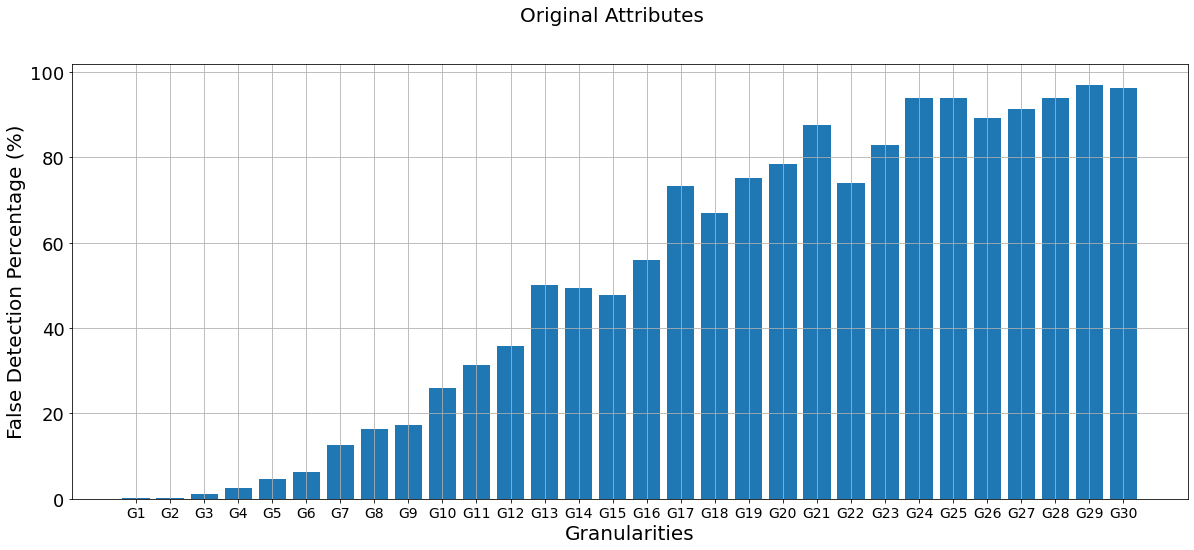

In [27]:
os.chdir( SODA_path )

fig = plt.figure(figsize=[20,8])

fig.suptitle('Original Attributes', fontsize=20)

ax = fig.subplots(1,1)

s = np.array(fp_rate) *100

barlist = ax.bar(x=['G' + str(x) for x in range(1,(len(s)+1))],height=s)

plt.ylabel('False Detection Percentage (%)',fontsize = 20)
plt.xlabel('Granularities',fontsize = 20)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=18)
ax.grid()


plt.show()
fig.savefig('Without_Feature_Extraction_fp.png', bbox_inches='tight')

os.chdir( base_path )

Considering that $P$ is the number of normal events processed by the model, the false detection percentage represents how many of those $P$ events were recognised as anomalies. As exhibited in the Figure above, for small granularities such as $G1$, our model miss-classify $0.1\%$ of the $P$ events, however for greater granularities such as $G30$, it recognised $96.3\%$ of the $P$ events as anomalies.

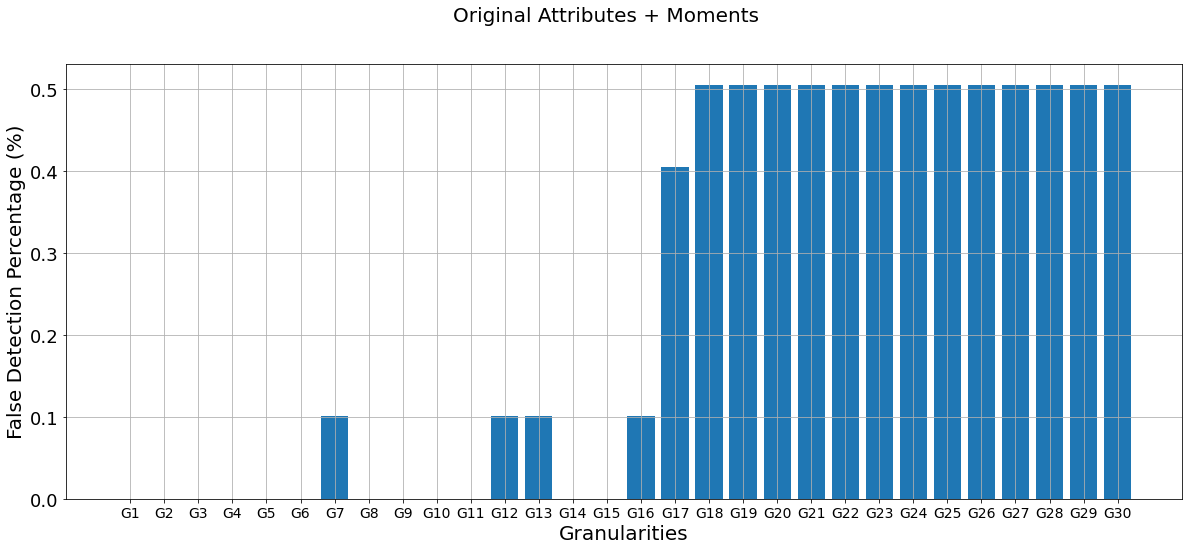

In [28]:
os.chdir( SODA_path )

fig = plt.figure(figsize=[20,8])

fig.suptitle('Original Attributes + Moments', fontsize=20)

ax = fig.subplots(1,1)

s = np.array(fp_rate2) *100

ax.bar(x=['G' + str(x) for x in range(1,(len(s)+1))],height=s)
plt.ylabel('False Detection Percentage (%)',fontsize = 20)
plt.xlabel('Granularities',fontsize = 20)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=18)
ax.grid()


plt.show()
fig.savefig('With_Feature_Extraction_fp.png', bbox_inches='tight')

os.chdir( base_path )

Furthermore, when using the original attributes along with moments, our model in the worst case, miss-classify $0.5\%$ of $P$ events for $G30$. It is worth to mention that, for some granularities, such as $G1$, our model does not miss-classify any of the $P$ events.

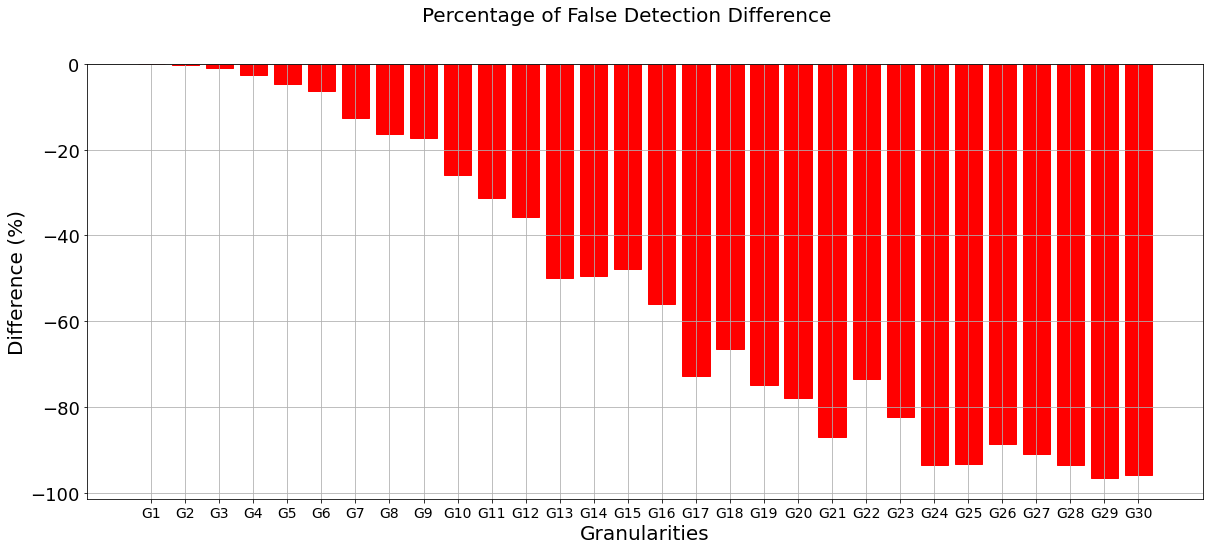

In [29]:
os.chdir( SODA_path )

fig = plt.figure(figsize=[20,8])

fig.suptitle('Percentage of False Detection Difference', fontsize=20)

ax = fig.subplots(1,1)

s = (np.array((fp_rate2)) - np.array((fp_rate))) * 100

barlist = ax.bar(x=['G' + str(x) for x in range(1,(len(s)+1))],height=s)

negative = []

for i in range(len(s)):
    if float(s[i]) < 0:
        negative.append(i)
        
for i in negative:
    barlist[i].set_color('r')

plt.ylabel('Difference (%)',fontsize = 20)
plt.xlabel('Granularities',fontsize = 20)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=18)
ax.grid()

plt.show()
fig.savefig('False_Positive_Comparrison.png', bbox_inches='tight')

os.chdir( base_path )

For comparison purpose, we subtracted the percentage of false detection when using moments from the percentage using only the original attributes. For greater granularities, such as $G30$, we have decreased the anomaly false detection from $96.3\%$ for $0.5\%$ and for small granularities, such as $G1$, the false detection percentage decreased to $0\%$.

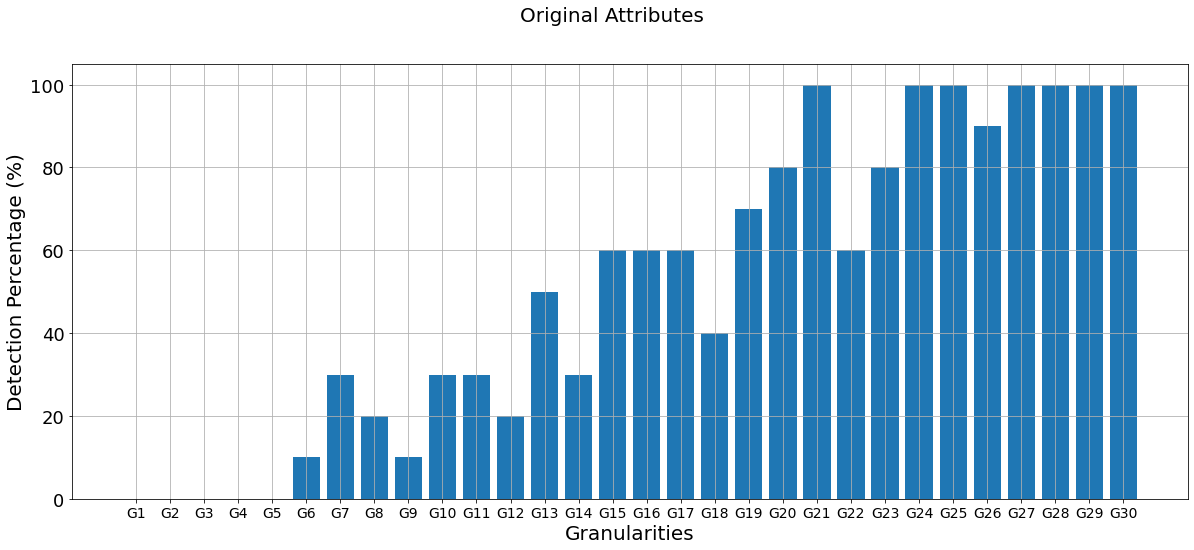

In [30]:
os.chdir( SODA_path )

# Plot Without Features extraction

fig = plt.figure(figsize=[20,8])

fig.suptitle('Original Attributes', fontsize=20)

ax = fig.subplots(1,1)

s = np.array(tp_rate) *100

ax.bar(x=['G' + str(x) for x in range(1,(len(s)+1))],height=s)
plt.ylabel('Detection Percentage (%)',fontsize = 20)
plt.xlabel('Granularities',fontsize = 20)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=18)
ax.grid()

plt.show()
fig.savefig('Without_Feature_Extraction_tp.png', bbox_inches='tight')

os.chdir( base_path )

Considering that $N$ is the number of anomaly events processed by the model, the detection percentage represents how many of those $N$ events were recognised as anomalies. For small granularities such as G1, our model does not detect any of the $N$ anomalies, however for greater granularities such as G30, it recognised all $N$ events.

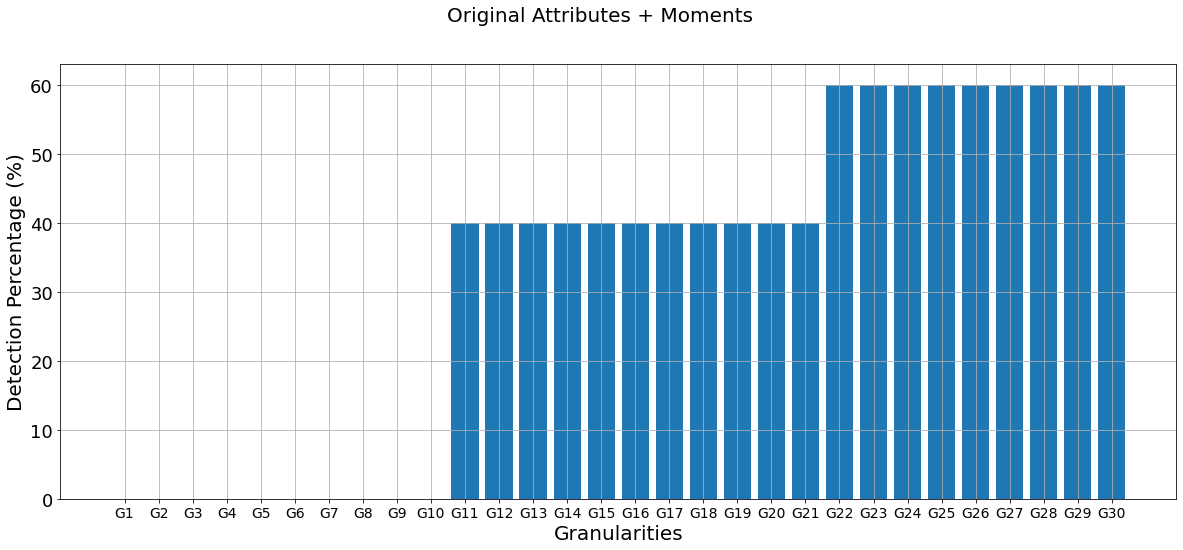

In [31]:
os.chdir( SODA_path )

# Plot With Features extraction

fig = plt.figure(figsize=[20,8])

fig.suptitle('Original Attributes + Moments', fontsize=20)

ax = fig.subplots(1,1)

s = np.array(tp_rate2) *100

ax.bar(x=['G' + str(x) for x in range(1,(len(s)+1))],height=s)
plt.ylabel('Detection Percentage (%)',fontsize = 20)
plt.xlabel('Granularities',fontsize = 20)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=18)
ax.grid()

plt.show()
fig.savefig('With_Feature_Extraction_tp.png', bbox_inches='tight')

os.chdir( base_path )

Furthermore, when using the original attributes along with moments, our model recognised $60\%$ of $N$ anomaly events for granularities greater then $G22$.

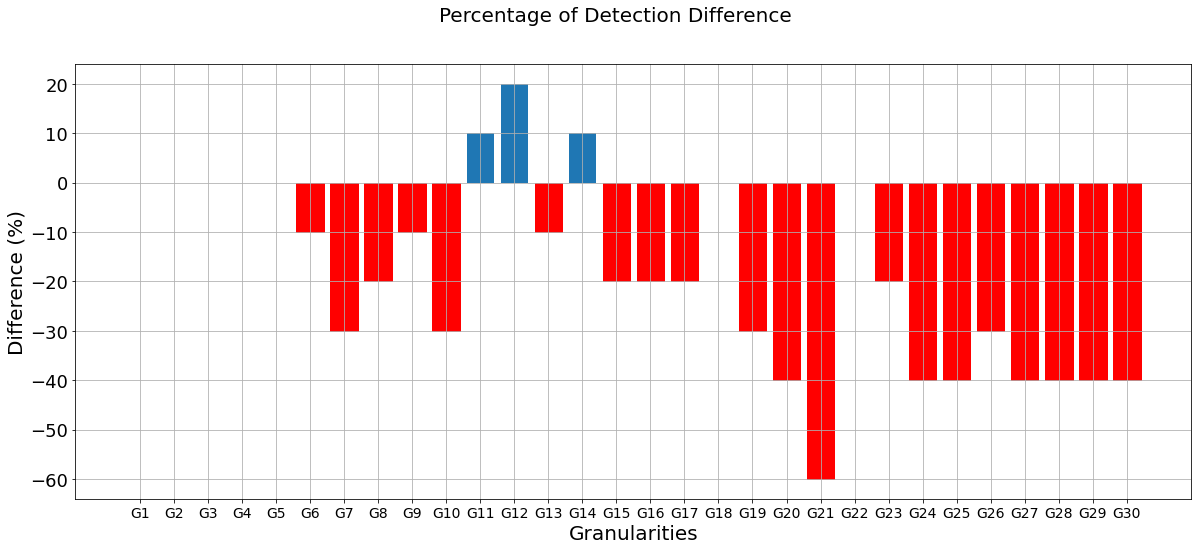

In [32]:
os.chdir( SODA_path )

#Ploting Comparrisons
                    
fig = plt.figure(figsize=[20,8])

fig.suptitle('Percentage of Detection Difference', fontsize=20)

ax = fig.subplots(1,1)

s = (np.array((tp_rate2)) - np.array((tp_rate))) * 100

barlist = ax.bar(x=['G' + str(x) for x in range(1,len(s)+1)],height=s)

negative = []

for i in range(len(s)):
    if float(s[i]) < 0:
        negative.append(i)

for i in negative:
    barlist[i].set_color('r')
        
plt.ylabel('Difference (%)',fontsize = 20)
plt.xlabel('Granularities',fontsize = 20)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=18)
ax.grid()

plt.show()
fig.savefig('True_Positive_Comparrison.png', bbox_inches='tight')

os.chdir( base_path )

For comparison purpose, we subtracted the percentage of detection when using moments from the percentage using only the original attributes. As presented in above, for the most granularities, such as $G7$, we have decresed the anomaly detection, however, for greater granularities, such as $G30$, the detection percentage was already $100\%$.
